Primeiro vamos importar os packages que vaos utilizar no projeto.

In [92]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt

Logo abaixo está o dataset escolhido.

In [55]:
dts = pd.read_csv("./iris.csv") 
dts

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Aqui se tem um dataset de Ataque do coração
fonte: https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [58]:
groupedBySpecies = dts.groupby("species")
print(groupedBySpecies["sepal_length"].mean())
print(groupedBySpecies["sepal_length"].std())

species
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal_length, dtype: float64
species
setosa        0.352490
versicolor    0.516171
virginica     0.635880
Name: sepal_length, dtype: float64


Na celula acima vemos que agrupando por espécies de flores a média o comprimento da sepala e seu desvio padrão.

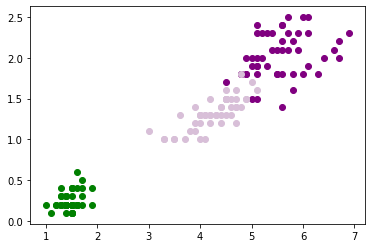

In [79]:
x = groupedBySpecies["petal_length"].apply(lambda x: x.to_numpy())
y = groupedBySpecies["petal_width"].apply(lambda x: x.to_numpy())
plt.scatter(x["setosa"],y["setosa"], color = "green")
plt.scatter(x["virginica"],y["virginica"],color = "purple")
plt.scatter(x["versicolor"],y["versicolor"], color = "thistle")
plt.show()

Agora foi feito um gráfico mostrando o comprimento da petala em comparação a largura da mesma.
A partir destas duas informações é possível distinguir as especies.

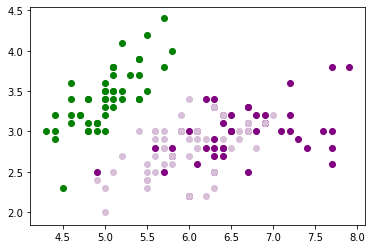

In [75]:
x = groupedBySpecies["sepal_length"].apply(lambda x: x.to_numpy())
y = groupedBySpecies["sepal_width"].apply(lambda x: x.to_numpy())
plt.scatter(x["setosa"],y["setosa"], color = "green")
plt.scatter(x["virginica"],y["virginica"],color = "purple")
plt.scatter(x["versicolor"],y["versicolor"], color = "thistle")
plt.show()

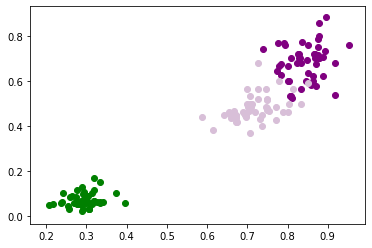

In [91]:
pl = groupedBySpecies["petal_length"].apply(lambda x: x.to_numpy())
pw = groupedBySpecies["petal_width"].apply(lambda x: x.to_numpy())
sl = groupedBySpecies["sepal_length"].apply(lambda x: x.to_numpy())
sw = groupedBySpecies["sepal_width"].apply(lambda x: x.to_numpy())

x = [pl["setosa"][i]/sl["setosa"][i] for i in range(len(pl["setosa"]))]
y = [pw["setosa"][i]/sw["setosa"][i] for i in range(len(sl["setosa"]))]
plt.scatter(x, y, color = "green")

x = [pl["virginica"][i]/sl["virginica"][i] for i in range(len(pl["virginica"]))]
y = [pw["virginica"][i]/sw["virginica"][i] for i in range(len(sl["virginica"]))]
plt.scatter(x, y, color = "purple")

x = [pl["versicolor"][i]/sl["versicolor"][i] for i in range(len(pl["versicolor"]))]
y = [pw["versicolor"][i]/sw["versicolor"][i] for i in range(len(sl["versicolor"]))]
plt.scatter(x, y, color = "thistle")
plt.show()

Agora iremos separar os dados em grupo de treinamento e grupo de teste

In [113]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Os valores de X serão os dados sobre o tamanho das pétalas e sépalas
x = dts.iloc[:, 0:4]

# O resultado que queremos é a espécie, que é a quinta coluna
y = dts.select_dtypes(include=[object])
print(y)

# Transformamos as strings das espécies em ints enumerados de 0 a 2
le = preprocessing.LabelEncoder()
y = y.apply(le.fit_transform)
print(y)

# 0 -> setosa
# 1 -> versicolor
# 2 -> virginica

# Montamos os conjuntos de treino e de teste, numa razão de 3 : 1
xTrain, xTest, yTrain, yTest = train_test_split(X, y, train_size=0.75, test_size = 0.25)

       species
0       setosa
1       setosa
2       setosa
3       setosa
4       setosa
..         ...
145  virginica
146  virginica
147  virginica
148  virginica
149  virginica

[150 rows x 1 columns]
     species
0          0
1          0
2          0
3          0
4          0
..       ...
145        2
146        2
147        2
148        2
149        2

[150 rows x 1 columns]


Depois, criamos um modelo e treinamos com xTrain e yTrain

In [111]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(activation='relu', hidden_layer_sizes=(10, 10, 10), max_iter=1000)
model.fit(xTrain, yTrain.values.ravel()) # o método ravel transforma as arrays aninhadas em uma única array

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

Agora testamos o modelo treinado com o conjunto de teste

In [116]:
predictions = model.predict(xTest)
numToLabel = ["setosa", "versicolor", "virginica"]
for i in range(len(predictions)):
    print(f"yTest = {yTest.values.ravel()[i]}, prediction = {predictions[i]}")

yTest = 2, prediction = 2
yTest = 0, prediction = 0
yTest = 0, prediction = 0
yTest = 1, prediction = 1
yTest = 2, prediction = 2
yTest = 0, prediction = 0
yTest = 2, prediction = 2
yTest = 2, prediction = 2
yTest = 0, prediction = 0
yTest = 2, prediction = 2
yTest = 0, prediction = 0
yTest = 0, prediction = 0
yTest = 1, prediction = 1
yTest = 2, prediction = 2
yTest = 2, prediction = 2
yTest = 0, prediction = 0
yTest = 1, prediction = 2
yTest = 0, prediction = 0
yTest = 0, prediction = 0
yTest = 0, prediction = 0
yTest = 0, prediction = 0
yTest = 0, prediction = 0
yTest = 0, prediction = 0
yTest = 2, prediction = 2
yTest = 2, prediction = 2
yTest = 0, prediction = 0
yTest = 0, prediction = 0
yTest = 1, prediction = 1
yTest = 1, prediction = 1
yTest = 0, prediction = 0
yTest = 1, prediction = 1
yTest = 2, prediction = 2
yTest = 2, prediction = 2
yTest = 2, prediction = 2
yTest = 2, prediction = 2
yTest = 0, prediction = 0
yTest = 0, prediction = 0
yTest = 1, prediction = 1


O modelo conseguiu prever com precisão bem alta, podemos verificar as propriedades do modelo para avaliar o quão bom ele está

In [117]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(yTest, predictions))
print(classification_report(yTest, predictions))

[[18  0  0]
 [ 0  6  1]
 [ 0  0 13]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92         7
           2       0.93      1.00      0.96        13

    accuracy                           0.97        38
   macro avg       0.98      0.95      0.96        38
weighted avg       0.98      0.97      0.97        38

